## Ανάλυση, Περιγραφή και Αξιολόγηση σε Μεγάλα Δεδομένα

#### (Φορτώνουμε τις αναγκαίες Βιβλιοθήκες πριν ξεκινήσουμε.)

In [1]:
#from pandas tutorial

# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline


#Import
import numpy as np
import pandas as pd# visualization
import seaborn as sns #optional but nice to have!!!
import matplotlib.pyplot as plt
%matplotlib inline
#if we are working on a notebook

#### Ανοίγουμε το αρχείο και παίρνουμε τα δεδομένα του.
#### (ΠΡΟΣΟΧΗ: Υποθέτουμε πως το αρχείο 'crime.csv' βρίσκεται στον ίδιο φάκελο με το notebook!)

In [2]:
import csv
cr=open('crime.csv')

count=0
#INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,
#0,1,2,3,4,5,6,
#OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
#7,8,9,10,11,12,13,14,15,16

df=pd.read_csv('crime.csv',header=0,names=['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','DISTRICT','REPORTING_AREA','SHOOTING','OCCURRED_ON_DATE','YEAR','MONTH','DAY_OF_WEEK','HOUR','UCR_PART','STREET','Lat','Long','Location'],engine='python', encoding="latin-1")#header=None
df['SHOOTING'].unique()
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


### 1. Παρουσιάστε τα γραφήματα που δείχνουν το πλήθος των εγκλημάτων ανά χρόνο, ανά μήνα και ανά ημέρα. Επίσης το πλήθος των εγκλημάτων ανά περιοχή (DISTRICT)

In [3]:
#variable testing
df['YEAR'].unique()
df['MONTH'].unique()
df['DAY_OF_WEEK'].unique()

df['DISTRICT'].unique()

df.dtypes
#df.YEAR.dtype

##print(df[['YEAR','INCIDENT_NUMBER']])
##print(df[['MONTH','INCIDENT_NUMBER']].groupby('MONTH').count())
##print(df[['DAY_OF_WEEK','INCIDENT_NUMBER']].groupby('DAY_OF_WEEK').count())

#print(df.groupby('MONTH').count())
#print(df.groupby('DAY_OF_WEEK').count())

#print(df.groupby('DISTRICT').count())
##print(df[['DISTRICT','INCIDENT_NUMBER']].groupby('DISTRICT').count())

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

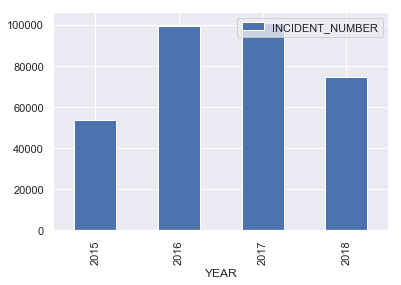

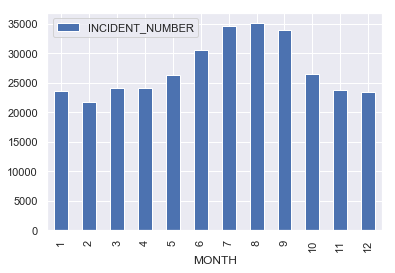

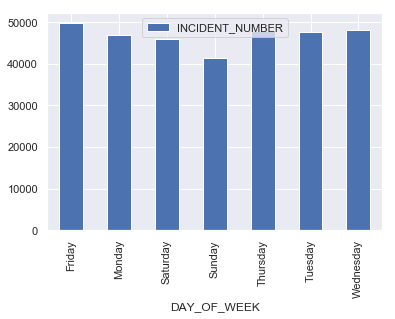

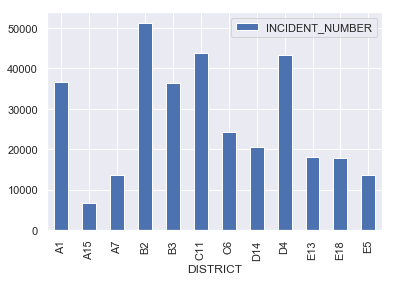

In [4]:
#the actual plots

#years
yearas=df[['INCIDENT_NUMBER','YEAR']].groupby('YEAR').count()#.tail(100)
#print(yearas)
#yeas=df[['YEAR']].count()#.groupby('YEAR')#.count()
#print(yeas)

#pdf=pd.DataFrame(df)

import seaborn as sns
sns.set()
#tips = sns.load_dataset(cr)
#tips=df
#ax = sns.barplot(x="day", y="total_bill", data=tips)
#ax = sns.barplot(data=yearas)#.count()
yearas.plot.bar()


#month
mths=df[['MONTH','INCIDENT_NUMBER']].groupby('MONTH').count()
#print(mths)
#ax = sns.barplot(x='MONTH',y='INCIDENT_NUMBER', data=mths)
mths.plot.bar()

#week
wk=df[['DAY_OF_WEEK','INCIDENT_NUMBER']].groupby('DAY_OF_WEEK').count()
wk.plot.bar()

#incidents
inc=df[['DISTRICT','INCIDENT_NUMBER']].groupby('DISTRICT').count()
inc.plot.bar()

### 2. Μελετήστε τα δεδομένα χρησιμοποιώντας την στήλη Shootings. Ποια χρονιά έχουμε τα περισσότερα shootings ; Σε ποια περιοχή (​DISTRICT) ​εμφανίζονται τα περισσότερα περιστατικά shootings ;

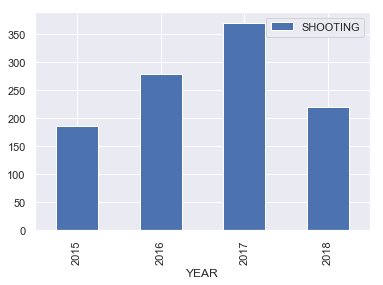

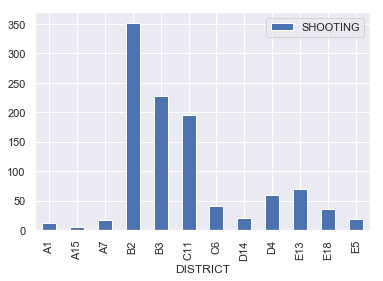

In [5]:
shoty=df[['SHOOTING','YEAR']].groupby('YEAR').count()
shoty.plot.bar()

shotd=df[['SHOOTING','DISTRICT']].groupby('DISTRICT').count()
shotd.plot.bar()

#### Παρατηρούμε πως έχουμε περισσότερα εγκλήματα με πυροβολισμούς το έτος '2017', με συνηθέστερη τοποθεσία τη 'B2'.

### 3. Χρησιμοποιήστε την πληροφορία από τη στήλη ‘HOUR’  και φτιάξτε μία καινούρια στήλη που αντιπροσωπεύει την πληροφορία “Day or Night”. Αν η ώρα είναι μεταξύ 18:00 μμ -06:00 πμ θεωρούμε ότι είναι νύχτα, αλλιώς θεωρούμε ότι είναι μέρα. Είναι περισσότερα τα εγκλήματα την ημέρα ή τη νύχτα ;

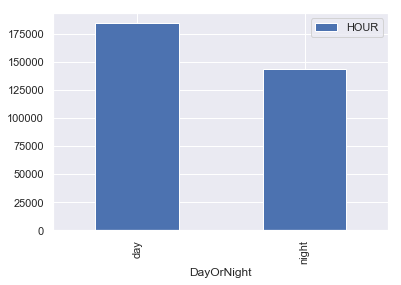

In [6]:
#assign the pandas dataframe

#assign each hour to either 'night', or day
nod=pd.DataFrame([[7,'day'],[8,'day'],[9,'day'],[10,'day'],[11,'day'],[12,'day'],[13,'day'],[14,'day'],[15,'day'],[16,'day'],[17,'day'],
                  [18,'night'],[19,'night'],[20,'night'],[21,'night'],[22,'night'],[23,'night'],[0,'night'],[1,'night'],[2,'night'],[3,'night'],[4,'night'],[5,'night'],[6,'night'],
                 ],columns=['HOUR','DayOrNight'])

#merge the dataframe with the larger database

hr=df[['HOUR']]#df[['INCIDENT_NUMBER','HOUR']]#.groupby('HOUR').count()
nhr=hr.merge(nod)
#print(nhr.head())

#print

nnhr=nhr.groupby('DayOrNight').count()
#print(nnhr.head())
nnhr.plot.bar()


#### Παρατηρούμε πως σύμφωνα με το τρόπο που αντιστοιχίσαμε τις ώρες ως 'Μέρα' και 'Νύχτα', τα περισσότερα εγκλήματα συνέβησαν κατά τη διάρκεια της ημέρας.

### 4. Συνδιάστε την νέα στήλη που προέκυψε (Day or Night)  με την στήλη “OFFENSE_CODE_GROUP“ και απαντήστε στην ερώτηση : Ποιος είναι ο πιο συχνός τύπος εγκλήματος που συμβαίνει την ημέρα ;

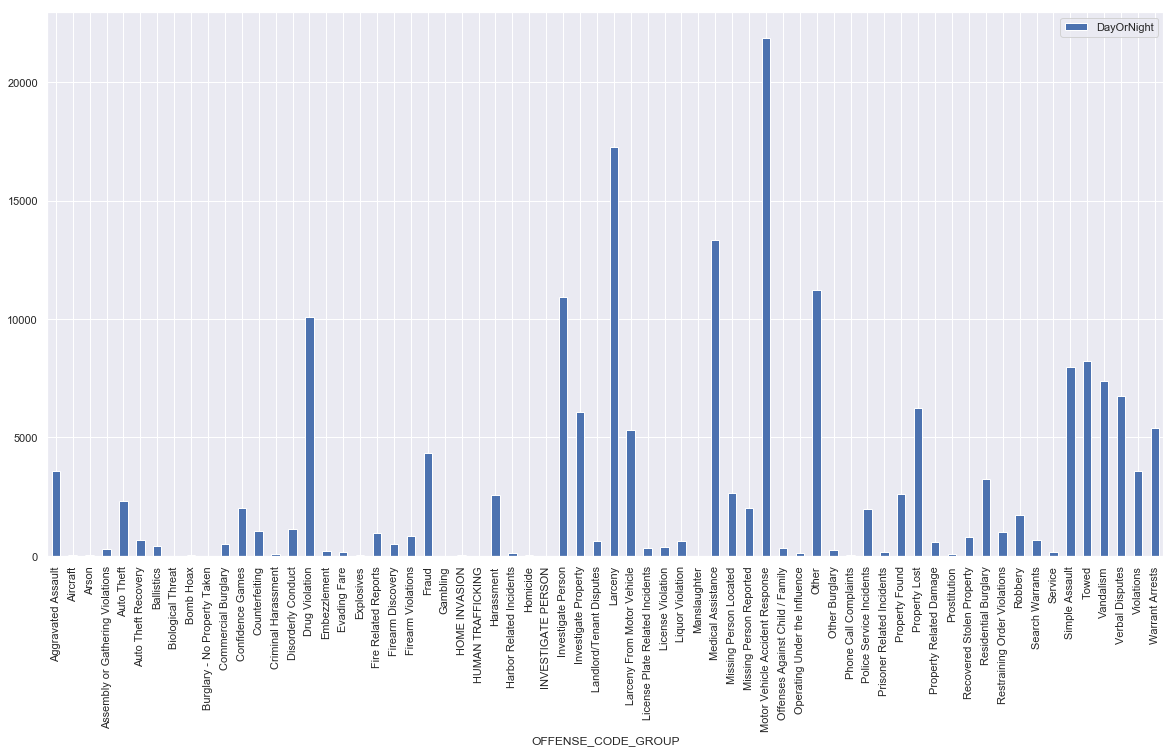

In [7]:
off=df[['HOUR','OFFENSE_CODE_GROUP']]#.merge(nod)
noff=off.merge(nod)
noff.head()

noff=noff.drop(columns='HOUR')

#Filter results to show exclusively incidents that happened during the 'day'
mask=noff.DayOrNight=='day' 
mask.head()

#print
noff[mask].head()
nnoff=noff[mask].groupby('OFFENSE_CODE_GROUP').count()
nnoff.plot.bar(figsize=(20,10)) #original figure size was too small to examine

#### Ο πιο συχνός τύπος εγκλήματος που συμβαίνει κατά τη διάρκεια της ημέρας είναι το 'Motor Vehicle Accident Response', με πάνω από είκοσι χιλιάδες περιστατικά.

### 5. Χρησιμοποιώντας τις στήλες Lat και Log και την βιβλιοθήκη KMeans θα εφαρμόσετε clustering με βάση την γεωγραφική τοποθεσία. Δοκιμάστε τον KMeans με 2,3,5,10 clusters. Στη συνέχεια συνδιάστε περισσότερες στήλες από τα δεδομένα σας και εφαρμόστε το clustering, δηλαδή με (location, OFFENSE_CODE) και (location, MONTH).

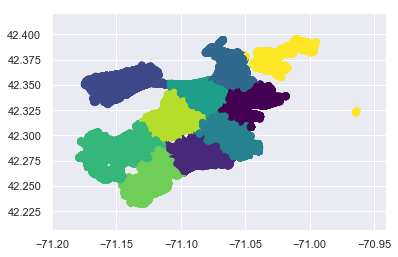

In [8]:
km=df[['Lat','Long']]
km.head()

from sklearn.cluster import KMeans
from sklearn import datasets

location=km.dropna()
location=location.loc[(location['Lat']>40)&(location['Long']<-60)]
location.head()
#ax=sns.scatterplot(x='Long',y='Lat',data=location)


#print according to number of clusters
kkm=KMeans(n_clusters=10)
kkm.fit(location)
kkm.predict(location)
labels=kkm.labels_

#tutorial https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
plt.scatter(x='Long',y='Lat',data=location,c=kkm.predict(location), s=50, cmap='viridis')
centers = kkm.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


In [9]:
##offense code
#loff=df[['Location','OFFENSE_CODE']]
#loff=loff.dropna()

#kml=KMeans(n_clusters=2)
#kml.fit_transform(loff)
#kml.predict(loff)
#plt.scatter(x='Location',y='OFFENSE_CODE',data=loff,c=kml.predict(loff), s=50, cmap='viridis')

##month
#lom=df[['Location','MONTH']]
#kml2=KMeans(n_clusters=2)
#kml2.fit(lom)
#kml2.predict(lom)
#plt.scatter(x='Location',y='OFFENSE_CODE',data=lom,c=kml2.predict(lom), s=50, cmap='viridis')

#### Τέλος notebook.